In [1]:
! wget https://raw.githubusercontent.com/martingerlach/hSBM_Topicmodel/master/sbmtm.py

--2020-08-28 09:27:06--  https://raw.githubusercontent.com/martingerlach/hSBM_Topicmodel/master/sbmtm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23596 (23K) [text/plain]
Saving to: ‘sbmtm.py’

sbmtm.py            100%[===================>]  23.04K  --.-KB/s    in 0.007s  

2020-08-28 09:27:06 (3.01 MB/s) - ‘sbmtm.py’ saved [23596/23596]



In [1]:
import graph_tool.all as gt
from sbmtm import sbmtm

In [ ]:
#model = sbmtm()
## we have to create the word-document network from the corpus
#model.make_graph(texts,documents=list(range(len(texts))))

In [2]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.datasets import make_multilabel_classification
#X, _ = make_multilabel_classification(random_state=0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import pandas as pd
import pickle
from tqdm import tqdm_notebook as tqdm

#### Locate the Resolution Limits and unknown Properties of the following Generative Process:
https://www.coursera.org/learn/ml-clustering-and-retrieval/lecture/O35EG/a-worked-example-for-lda-deriving-the-resampling-distribution

og i Big Data and Social Science s(195-197)



** FORMULA **

![](lda_formula.png)


So the algorithm will keep track of how many times a document $d$ has used a topic $k$, $N_d,k$
$\alpha$ is the smoothing term.

$N_d$ is how many words are in the document.

$ V_k,w $ is the count of a word in a specific topic, $ V_k  = \sum_{w} V_k,w $ is the sum of all words in the topic. 
$V\beta$

In [25]:
## Random initialization
np.random.multinomial(1,pvals=[0.1,0.5,0.4],size=10)


array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

In [3]:
import random
n = 100
dtrue = np.random.multinomial(1,pvals=[0.1,0.5,0.4],size=n)

k = 10
alpha = 1/k
docprobs = np.random.dirichlet([alpha]*k,size=n)

In [6]:
true.T.dot(docprobs)

array([[0.98710773, 2.28165911, 0.37822742, 0.79370029, 2.21383995,
        1.57579824, 0.45320784, 1.00963605, 1.05542654, 0.25139683],
       [4.71559604, 4.45099705, 6.99874287, 2.19901134, 2.69054348,
        3.56966241, 3.19367267, 4.75077462, 2.41076731, 5.02023221],
       [3.43992073, 7.24008316, 5.63269307, 2.06707581, 7.10634316,
        4.90215316, 2.52410315, 6.21271458, 5.2552639 , 4.61964929]])

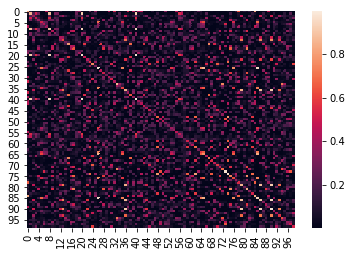

In [24]:
sns.heatmap(docprobs.dot(docprobs.T))

### Misspecified K: Predictable conglomeration based on matching of sizes.
Topics can afford to be as big as the prior allows it to. This means that when 



### Simulation
#### Goals: 
* Show that the Model is deeply constrained by K, when no search is made for the Dirichlet Prior describing the topic proportions. (Ref showing the importance of topic proportion prior)
* That it has very different properties than a hierachical model or even one of the most common clustering techniques (K-means), which serves as underlying theoretical tool for reasoning with a model, since it is also affected by each underlying topic having to conforms to a certain size for it not to be divided into to or collapsed with another small topic.
* That in fact this is one of the main reasons for Collapsing otherwise separate topics and Dividing otherwise Coherent Clusters. When a topic is too small, and another one is just right. 


* Find Splits and Collapses from variations in Exclusivity and Proportion distribution.

**-- Setup**

Draw samples from 3 distribution (uni og bi-dimensional distributions?), and convert each data point into a categorical (by rounding)
    * 1 has overlaps with 2
    * 2 is in the middle, 
    * 3 has overlap with 2. But might be further away.
* Should points be drawn from Uni or Bi-dimensional distributions? 
    - Bi-dimensional 
        - Could resemble the famous misspecified Kmeans plots. 
        - Could allow for more complex collapses, that arise from relative low distance in one dimension, and due to constraints ignores distance on the other dimension.
        - Could introduce cycles were distributions are similar to each other on some dimensions but not others. Thereby creating dillemas that will result in great instability.
    - Uni-dimensional 
        - Will give other visualization possibilities:
            - Heatmaps. where each row is a different size parameter. And each box is the points misspecification.
        
**-- Configurations**
    * Length of documents. (this will create Document collections that are similar)
    * Proportions and density / overlap between the Distributions. 
    
        
       Overlap: 
            - Vary distance in means. 
            - Vary the distribution type + variance.
            
                - Distributions:
                    - Uniform distribution: creating high overlap.
                    - Normal dist: creating reasonable low.
       Proportion:
           - Egalitarian Condition.
           - One dominant: Two equally small. 
       Entropy: 
           - Defining how many different tokens are in the Topic.
           - Done by Rounding digits, and by varying the distribution tokens are drawn from.
       Size of documents:
            - Will effect the certainty of which topics can distinquish distribution within a single document.
        

### Two simulations
Two conditions that the model should be able to handle:
- Co-occurring multiple topics pr doc.
    - Have a predefined Proportion of each topic: from egalitarian to one dominant.
    - Draw from dirichlet process: np.random.dirichlet()
    
        - Define variance of the dirichlet. 
- Single Topic pr. doc with overlapping words from each distribution.


In [202]:
#for i in np.linspace(1.01,3,10):
#    x,y = zip(*sorted(Counter(np.random.zipf(a=i,size=200000)).items()))
#    plt.plot(x,y,label=round(i,1))
#plt.yscale('log')
#plt.legend()

In [ ]:
## Configure Entropy. To make it Collapse.

In [177]:
## Construct 3  distributions where the third has two subtopics.

In [4]:
import scipy.stats
def normalize_entropy(series):
    result = scipy.stats.entropy(((series.T/series.sum(axis=1)).T).T)
    return result[0]


In [197]:
#np.random.zipf(a=a,size=1000)

In [197]:
np.random.dirichlet([5,5],size=10)

array([[0.73887862, 0.26112138],
       [0.34639958, 0.65360042],
       [0.58223369, 0.41776631],
       [0.36383083, 0.63616917],
       [0.41791779, 0.58208221],
       [0.62298611, 0.37701389],
       [0.46667362, 0.53332638],
       [0.42538555, 0.57461445],
       [0.35295752, 0.64704248],
       [0.70674449, 0.29325551]])

In [5]:
## subtopics
subtopic_overlap = sorted(set(np.concatenate([1/np.linspace(1,20,200)[::-1],np.linspace(1,20,200)])))
proportions = np.array([0.5,0.5])
dists = []
for ratio in subtopic_overlap:
    dists.append(np.random.dirichlet(proportions*ratio,size=1000).flatten())
#sns.distplot(np.array(dists))
dist_df = pd.DataFrame(np.array(dists).T,columns=subtopic_overlap)



In [274]:
## Make Two Cases: High and low entropy and see which will be incorporated into the small one.


In [297]:
#for a in np.linspace(1.5,4,20):
#    s = np.random.zipf(a, 100)
#    print(round(a,1),scipy.stats.entropy(s/s.sum()))

In [6]:

temp,temp2 = [],[]
for i in range(10000):
    s = np.random.zipf(2, 100)
    
    s2 = np.concatenate([np.random.zipf(2, 50),np.random.zipf(2, 50)])
    ent,ent2 = scipy.stats.entropy(s/s.sum()),scipy.stats.entropy(s2/s2.sum())
    temp.append(ent),temp2.append(ent2)
np.mean(temp),np.mean(temp2)

(3.2165483546733986, 3.2216070500933185)

In [7]:
def run_lda(docs):
    lda = LDA(n_components=3,learning_method='batch',verbose=1)
    doc2topics = lda.fit_transform(docs)
    return doc2topics,lda
def get_measures(doc2topic):
    dist2topic = make_dist2topic(doc2topics)
    dist2max = get_main_topic(dist2topic)
    loss = get_loss(dist2topic)
    proportions = get_proportions(doc2topics)
    return dist2topic,dist2max,loss
def get_proportions(doc2topic):
    proportions = doc2topics.sum(axis=0)
    return proportions

In [8]:
n_tokens = 100
def generate_docs(proportion_variance=1,subtopic_overlap=1,ratio_pos=2,ratio=1,reverse_ratio=False,n_docs = 500,docsize = 1000):
    """
    proportion_variance: determines how much the propotion of topics vary and is expressed 
    as a factor multiplying the alpha parameter (0.33). 
    
    ratio_pos: determines which topic to be dominant: the low entropy, high entropy, or the subtopic one.
    
    ratio: determines the topic proportion
    reverse_ratio: determine if the ratio should be applied to the two other distributions.
    
    subtopic_overlap: determine the overlap between the first topic
    n_docs: determines the size of the two other
    
    docsize: determines the count of each document."""
    ## Determine topics
    ratio = int(ratio)
    
    topic_proportions = np.array([0.33,0.33,0.33])*proportion_variance
    if reverse_ratio:
        topic_proportions[0] *= ratio
        topic_proportions[1] *= ratio
    else:
        topic_proportions[-1] *= ratio
    doc_topic_proportions = np.random.dirichlet(topic_proportions,size=n_docs*ratio)
    # make documents
    
    X = np.zeros((n_docs*ratio,n_tokens*3))
    
    count_distributions = np.zeros(4)
    # make simple topics
    for num in range(2):
        dist = distributions[num]
        weights = doc_topic_proportions[:,num]
        for i in range(n_docs*ratio):
            weight = weights[i]
            count_distributions[num]+=weight
            word_counts = np.random.multinomial(int(docsize*weight),dist)
            X[i,num*n_tokens:(num+1)*n_tokens] = word_counts            
    # make subtopic topics
    proportions = np.array([0.5,0.5])
    sub_sizes = np.random.dirichlet(proportions*subtopic_overlap,size=n_docs*ratio)
    
    for num in range(2,4):
        dist = distributions[num]
        weights = doc_topic_proportions[:,2]
        sub_weights = sub_sizes[:,num-2]
        for i in range(n_docs*ratio):
            weight = weights[i]
            sub_weight = sub_weights[i]
            count_distributions[num]+=(weight*sub_weight)
            word_counts = np.random.multinomial(int(docsize*weight*sub_weight),dist)
            X[i][2*n_tokens+(num-2)*(n_tokens//2):2*n_tokens+(num-1)*(n_tokens//2)] = word_counts
    return X,sub_sizes,doc_topic_proportions,count_distributions
    

In [9]:
X,sub_sizes,doc_topic_proportions,count_distributions = generate_docs(ratio=1,reverse_ratio=True,n_docs=1000,docsize=250)
doc_topic_proportions.sum(axis=0)

NameError: name 'distributions' is not defined

In [97]:
#sub_sizes
count_distributions

array([687.40343453, 658.34899342, 339.29586086, 314.95171119])

In [105]:
np.random.multinomial(int(100*0.001),distributions[0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
#model = make_graph(X)
#

In [24]:
g = model.g

In [26]:
model.get_N(),model.get_D(),model.get_V()

(100401, 1000, 300)

In [10]:
import os
files = ['simulation_results/log/'+i for i in os.listdir('simulation_results/log/') if not i=='log.csv']
dist_count = int(max(files,key=lambda x: int(x.split('_')[-1])).split('_')[-1])


In [11]:
## Configurations,
### N_tokens
### Entropies
#entropies = [{'low_ent':2,'high_ent':3,'sub_ent':2.5},{'low_ent':1.75,'high_ent':2}]
entropies = [2,3]
dominant_ent = 2.5
n_tokens = 100
dist_params = {'n_tokens':n_tokens,'dominant_entropy':dominant_ent,'entropies':entropies}
distributions = []
for a in entropies:
    s = np.random.zipf(a, 100)
    s.sort()
    distributions.append(s/s.sum())
for _ in range(2):
    s = np.random.zipf(dominant_ent, 100//2)
    s.sort()
    distributions.append(s/s.sum())


In [12]:
dist_count+=1
pickle.dump([distributions,dist_params],open('simulation_results/log/distribution_%d'%dist_count,'wb'))

In [11]:

import random,pickle
filename = random.choice(['simulation_results/log/'+i for i in os.listdir('simulation_results/log/') if not i=='log.csv'])
dist_count = int(filename.split('_')[-1])
distributions,dist_params = pickle.load(open(filename,'rb'))

In [14]:
def make_topic_co_occur(X):
    co_occur = X.T.dot(X)
    starts = [0,100,200,250,300]
    startstops = list(zip(starts[:-1],starts[1:]))
    top_occur = np.zeros((len(starts)-1,len(starts)-1))

    for num in range(4):
        start,stop = startstops[num]
        for num2 in range(num,4): 
            start2,stop2 = startstops[num2]
            count = co_occur[start:stop,start2:stop2].sum()
            top_occur[num,num2] = count
            top_occur[num2,num] = count
            #in_ = co_occur[start:stop,start:stop].sum()
            #out = co_occur[start:stop,:].sum()-in_
            #print(in_,out,in_/co_occur[start:stop,:].sum())
    starts = [0,100,200,300]
    startstops = list(zip(starts[:-1],starts[1:]))
    top_occur2 = np.zeros((len(starts)-1,len(starts)-1))
    
    for num in range(len(starts)-1):
        start,stop = startstops[num]
        for num2 in range(num,len(starts)-1): 
            start2,stop2 = startstops[num2]
            count = co_occur[start:stop,start2:stop2].sum()
            top_occur2[num,num2] = count
            top_occur2[num2,num] = count
            #in_ = co_occur[start:stop,start:stop].sum()
            #out = co_occur[start:stop,:].sum()-in_
            #print(in_,out,in_/co_occur[start:stop,:].sum())
    
    
    starts = [0,100,200,250,300]
    startstops = list(zip(starts[:-1],starts[1:]))
    w2top = np.zeros((n_tokens*3,len(starts)-1))
    
    for num in range(len(starts)-1):
        start,stop = startstops[num]
        for w in range(n_tokens*3):
            count = co_occur[w:,start:stop].sum()
            w2top[w,num] = count
    starts = [0,100,200,300]
    startstops = list(zip(starts[:-1],starts[1:]))
    w2top2 = np.zeros((n_tokens*3,len(starts)-1))
    
    for num in range(len(starts)-1):
        start,stop = startstops[num]
        for w in range(n_tokens*3):
            count = co_occur[w:,start:stop].sum()
            w2top[w,num] = count
    w_sum = X.sum(axis=0)
    return top_occur,top_occur2,co_occur,w_sum,w2top,w2top2
#top_occur,top_occur2,co_occur,w_sum,w2top,w2top2 = make_topic_co_occur(X)
    #top_occur2 / top_occur2.sum(axis=1)  

<AxesSubplot:>

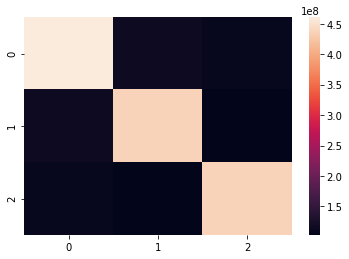

In [63]:
sns.heatmap(top_occur2)

In [19]:

#X,sub_sizes,doc_dist_proportions,distribution_counts = generate_docs(subtopic_overlap=i,n_docs=int(n_docs),docsize=dsize)

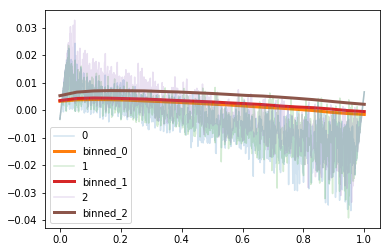

In [272]:
### individual doc loss

for num in range(3):
    a,a2 = doc_dist_proportions[:,num],doc2topics[:,assigned[num]]
    temp_loss = a-a2
    sort_idx = a.argsort()
    
    plt.plot(a[sort_idx],temp_loss[sort_idx],label=str(num),alpha=0.2)
    ## Count 20 bins loss mean and std
    a,temp_loss = a[sort_idx],temp_loss[sort_idx]
    binned_loss = []
    binned_std = []
    for i,j in zip(np.linspace(0,1,20)[1:],np.linspace(0,1,20)[1:]):
        a_idx = (a<=i)&(a<j)
        temp_i = temp_loss[a_idx]
        binned_loss.append(temp_i.mean())
        binned_std.append(temp_i.std())
    plt.plot(np.linspace(0,1,19),binned_loss,label='binned_%d'%num,lw=3)
plt.legend()
### individual word loss

#### Quantify how much a word is in a dominant topic document.
    


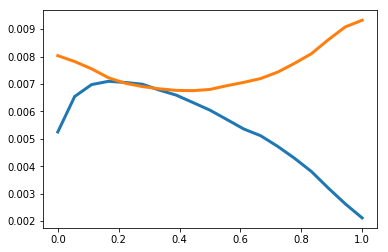

In [220]:
plt.plot(np.linspace(0,1,19),binned_loss,label='binned_%d'%num,lw=3)
plt.plot(np.linspace(0,1,19),binned_std,label='binned_%d'%num,lw=3)

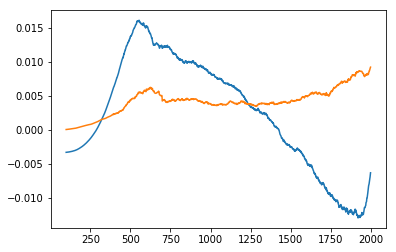

In [190]:
pd.Series(temp_loss[sort_idx]).rolling(window=100).mean().plot()
pd.Series(temp_loss[sort_idx]).rolling(window=100).std().plot()

In [147]:
def run_simulation(params):
    global t,delta_t
    # generate docs
    X,sub_sizes,doc_dist_proportions,distribution_counts = generate_docs(**params)
    doc_dist_proportions_sub = np.zeros((len(X),4))
    doc_dist_proportions_sub[:,0:2] = doc_dist_proportions[:,0:2]
    doc_dist_proportions_sub[:,2] = doc_dist_proportions[:,2]*sub_sizes[:,0]
    doc_dist_proportions_sub[:,3] = doc_dist_proportions[:,2]*sub_sizes[:,1]
    ## run lda
    doc2topics,lda = run_lda(X)
    word2topic = lda.components_
    ### Calculate CoOccurence stats.
    top_occur,top_occur2,co_occur,w_sum,w2top,w2top2 = make_topic_co_occur(X)

    ## assign each distribition to topic.
    #assigned = doc_dist_proportions.T.dot(doc2topics).argsort().T[::-1].T[:,0]
    w2loss = w_sum.copy()
    assigned = np.zeros(3,dtype=np.int)
    for num in range(3):
        start,stop = num*n_tokens,(num+1)*n_tokens

        assigned[num] = int(word2topic[:,start:stop].sum(axis=1).argmax())

        top_num = assigned[num]
        w2loss[start:stop] = w2loss[start:stop] - word2topic[top_num,start:stop]
    loss_frac = np.absolute(w2loss).sum()/w_sum.sum()
    ## measure error
    loss = np.zeros(3)
    for num in range(3):
        a,a2 = doc_dist_proportions[:,num],doc2topics[:,assigned[num]]
        loss[num] = sum(abs(a-a2))
    ## measure individual doc error.
    binned_losses = []
    binned_stds = []
    doc2loss = np.zeros((len(X),3))
    for num in range(3):
        a,a2 = doc_dist_proportions[:,num],doc2topics[:,assigned[num]]
        temp_loss = a-a2
        doc2loss[:,num] = temp_loss
        sort_idx = a.argsort()
        ## Count 20 bins loss mean and std
        a,temp_loss = a[sort_idx],temp_loss[sort_idx]
        binned_loss = []
        binned_std = []
        for i,j in zip(np.linspace(0,1,20)[1:],np.linspace(0,1,20)[1:]):
            a_idx = (a<=i)&(a<j)
            temp_i = temp_loss[a_idx]
            binned_loss.append(temp_i.mean())
            binned_std.append(temp_i.std())
        binned_losses.append(binned_loss)
        binned_stds.append(binned_std)
    ## measure word loss
    w2loss = w_sum.copy()
    for num in range(3):
        top_num = assigned[num]
        w2loss[num*n_tokens:(num+1)*n_tokens] -=word2topic[top_num,num*n_tokens:(num+1)*n_tokens]
    #w2loss = w_sum-word2topic.max(axis=0)

    ## quantify the degree to which each occurence has high topicality
    ### w_dist_proportions
    w_dist_proportions = (X.T.dot(doc_dist_proportions_sub).T/X.sum(axis=0)).T

    # dump data
    ### word_properties:
    #### w_sum: word counts in corpus
    #### word2topic : topic assignment
    #### w_dist_proportions: average fractions of each distribution pr word.
    ######(X.T.dot(doc_dist_proportions_sub).T/X.sum(axis=0)).T

    word_properties = [w_sum,word2topic,w_dist_proportions,w2loss]

    ### doc_properties
    #### doc_dist_proportions: fraction of each distribution in each document
    #### doc_dist_proportions: fraction of each distribution in each document including subtopics
    #### doc2topics: document assignment based on LDA.
    #### doc2loss: document level difference between distribution proportions and assigned topic proportions
    doc_properties = [doc2loss,doc_dist_proportions,doc_dist_proportions_sub,doc2topics]

    ### co-occurence
    #### top_occur: co-occurence matrix between distributions.
    #### top_occur2: co-occurence matrix between distributions including sub distributions
    #### w2top: co_occurence stats of each word to each distribution
    #### w2top2: co_occurence stats of each word to each distribution including subdistribution
    ####co_occur: co occurence matrix between all words.
    co_occurence = [top_occur,top_occur2,w2top,w2top2,co_occur]

    ### performance
    #### loss: absolute deviation from real distribution proportions to assigned topic proportions.
    #### binned_losses: losses as a function of document proportions (small to high dist proportion)
    ##### binned into 20 different proportions.
    #### binned_stds: variance in the proportion bin.
    performance = [loss,loss_frac,binned_losses, binned_stds]

    ## meta
    ### params
    meta = [params,dist_count]

    for name,l in zip(['wprop','dprop','cooccur','performance','meta'],[word_properties,doc_properties,co_occurence,performance,meta]):
        filename = basename+'_%s'%name
        with open(filename,'wb') as f:
            pickle.dump(l,f)
    ### write log
    loss = loss.sum()
    ## write log
    ## header = ['t','delta_t','distribution_id','loss','loss_frac']+keys
    delta_t = time.time()-t
    row = [t,delta_t,dist_count,modelid,loss,loss_frac]+[params[i] for i in keys]
    logfile.write(','.join(map(str,row))+'\n')
    logfile.flush()
    ## reset time
    t = delta_t

In [225]:
"""
    proportion_variance: determines how much the propotion of topics vary and is expressed 
    as a factor multiplying the alpha parameter (0.33). 
    
    ratio_pos: determines which topic to be dominant: the low entropy, high entropy, or the subtopic one.
    
    ratio: determines the topic proportion
    reverse_ratio: determine if the ratio should be applied to the two other distributions.
    
    subtopic_overlap: determine the overlap between the first topic
    n_docs: determines the size of the two other
    
    docsize: determines the count of each document."""


docsizes = [100,200]
ndocs = [500]
proportion_variance = [0.1,1,3,5,10]
ratios = np.linspace(1,200,100)
reverse = [True,False]
## the higher the stronger overlap
subtopic_overlap = [0.1,1,3,5,10]
ratio_pos = [2]
fixed = {'ratio_pos':2}
import itertools
parameters = sorted(list(itertools.product(*[docsizes,ndocs,proportion_variance,ratios,reverse,subtopic_overlap,ratio_pos])),key=lambda x: x[4])
keys = 'docsize,n_docs,proportion_variance,ratio,reverse_ratio,subtopic_overlap,ratio_pos'.split(',')

In [229]:
parameters[763:777]

[(100, 500, 1, 105.52525252525251, False, 5, 2),
 (100, 500, 1, 105.52525252525251, False, 10, 2),
 (100, 500, 1, 107.53535353535352, False, 0.1, 2),
 (100, 500, 1, 107.53535353535352, False, 1, 2),
 (100, 500, 1, 107.53535353535352, False, 3, 2),
 (100, 500, 1, 107.53535353535352, False, 5, 2),
 (100, 500, 1, 107.53535353535352, False, 10, 2),
 (100, 500, 1, 109.54545454545453, False, 0.1, 2),
 (100, 500, 1, 109.54545454545453, False, 1, 2),
 (100, 500, 1, 109.54545454545453, False, 3, 2),
 (100, 500, 1, 109.54545454545453, False, 5, 2),
 (100, 500, 1, 109.54545454545453, False, 10, 2),
 (100, 500, 1, 111.55555555555554, False, 0.1, 2),
 (100, 500, 1, 111.55555555555554, False, 1, 2)]

In [234]:
parameters[1000:1700]

[(100, 500, 3, 1.0, False, 0.1, 2),
 (100, 500, 3, 1.0, False, 1, 2),
 (100, 500, 3, 1.0, False, 3, 2),
 (100, 500, 3, 1.0, False, 5, 2),
 (100, 500, 3, 1.0, False, 10, 2),
 (100, 500, 3, 3.01010101010101, False, 0.1, 2),
 (100, 500, 3, 3.01010101010101, False, 1, 2),
 (100, 500, 3, 3.01010101010101, False, 3, 2),
 (100, 500, 3, 3.01010101010101, False, 5, 2),
 (100, 500, 3, 3.01010101010101, False, 10, 2),
 (100, 500, 3, 5.02020202020202, False, 0.1, 2),
 (100, 500, 3, 5.02020202020202, False, 1, 2),
 (100, 500, 3, 5.02020202020202, False, 3, 2),
 (100, 500, 3, 5.02020202020202, False, 5, 2),
 (100, 500, 3, 5.02020202020202, False, 10, 2),
 (100, 500, 3, 7.030303030303029, False, 0.1, 2),
 (100, 500, 3, 7.030303030303029, False, 1, 2),
 (100, 500, 3, 7.030303030303029, False, 3, 2),
 (100, 500, 3, 7.030303030303029, False, 5, 2),
 (100, 500, 3, 7.030303030303029, False, 10, 2),
 (100, 500, 3, 9.04040404040404, False, 0.1, 2),
 (100, 500, 3, 9.04040404040404, False, 1, 2),
 (100, 500, 

#### Reproducability.
Check which parameters sets have been run for Current distribution.



In [5]:
keys = 'docsize,n_docs,proportion_variance,ratio,reverse_ratio,subtopic_overlap,ratio_pos'.split(',')
done_df = pd.read_csv('simulation_results/log/log.csv',skiprows=[0],names  = ['t','delta_t','distribution_id','model_id','loss','loss_frac']+keys)
#done = set([tuple(row) for row in done_df[done_df.distribution_id==dist_count][keys].values])
#len(done)

In [286]:
done_df.tail()

,t,delta_t,distribution_id,model_id,loss,loss_frac,docsize,n_docs,proportion_variance,ratio,reverse_ratio,subtopic_overlap,ratio_pos
1290,1.545352e+09,2.823237e+04,0,1267,42619.633244,0.629550,100,500,1.0,71.714286,False,3.0,2
1291,2.823237e+04,1.545352e+09,0,1268,34462.364606,0.562596,100,500,1.0,71.714286,False,5.0,2
1292,1.545352e+09,2.846250e+04,0,1269,35607.035495,0.503695,100,500,1.0,71.714286,False,10.0,2
1293,2.846250e+04,1.545353e+09,0,1270,24229.874513,0.516142,100,500,1.0,71.714286,False,15.0,2
1294,1.545353e+09,2.864314e+04,0,1271,54205.489727,0.496265,100,500,1.0,73.734694,False,0.1,2


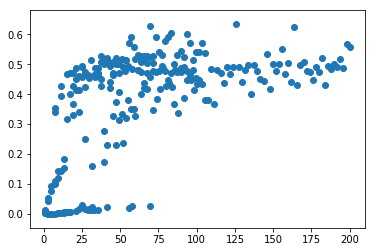

In [294]:
plt.scatter(done_df[done_df.subtopic_overlap==10].ratio,done_df[done_df.subtopic_overlap==10].loss_frac)

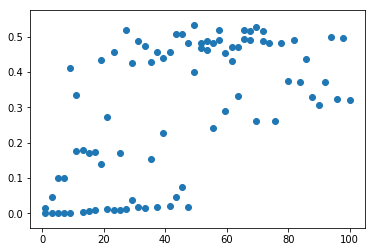

In [295]:
plt.scatter(done_df[done_df.subtopic_overlap==15].ratio,done_df[done_df.subtopic_overlap==15].loss_frac)

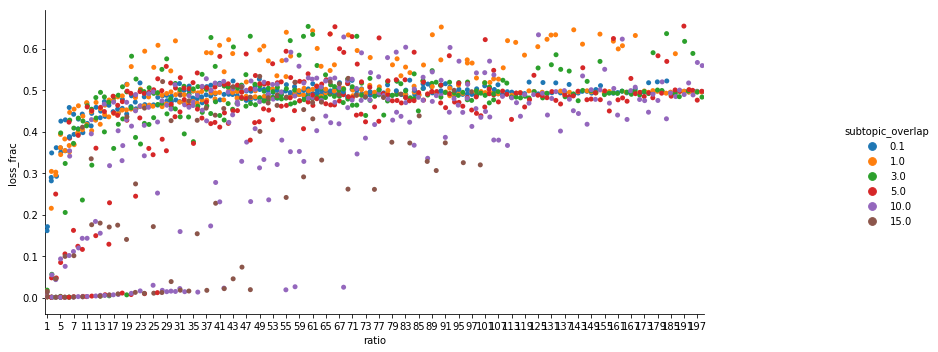

In [283]:

g = sns.catplot(x='ratio',y='loss_frac',hue='subtopic_overlap',data=done_df)
g.ax.set_xticks([i for i in range(done_df.ratio.nunique()) if i%3==0])
g.ax.set_xticklabels([i for num, i in enumerate(map(int,sorted(set(done_df.ratio)))) if num%3==0]);
g.fig.set_size_inches(15,5)

In [15]:
np.random.dirichlet([0.5,0.5])

array([0.02692162, 0.97307838])

In [25]:
np.random.dirichlet([7.5,7.5])

array([0.61113801, 0.38886199])

In [213]:
#list(map(int,sorted(set(done_df.ratio.values))))

In [223]:
params

{'docsize': 100,
 'n_docs': 500,
 'proportion_variance': 0.1,
 'ratio': 1.0,
 'reverse_ratio': False,
 'subtopic_overlap': 0.1,
 'ratio_pos': 2}

In [23]:
done_df.head()

,t,delta_t,distribution_id,loss,docsize,n_docs,proportion_variance,ratio,reverse_ratio,subtopic_overlap,ratio_pos
0,1.545158e+09,7.192938e-01,0,5.996402,100,500,0.1,1.0,False,0.1,2
1,1.545158e+09,7.344508e-01,0,6.019675,100,500,0.1,1.0,False,1.0,2
2,7.344508e-01,1.545158e+09,0,6.101063,100,500,0.1,1.0,False,3.0,2
3,1.545158e+09,1.750185e+00,0,6.104121,100,500,0.1,1.0,False,5.0,2
4,1.750185e+00,1.545158e+09,0,6.093647,100,500,0.1,1.0,False,10.0,2


In [392]:
done = set()

In [214]:
basepath = 'simulation_results/results/'

In [215]:
params

{'docsize': 100,
 'n_docs': 500,
 'proportion_variance': 0.1,
 'ratio': 1.0,
 'reverse_ratio': False,
 'subtopic_overlap': 0.1,
 'ratio_pos': 2}

In [62]:
#X.sum(axis=0).shape

In [96]:
#model.get_D()

In [20]:
def make_graph(X):
    model = sbmtm()
    docs = []
    for doc in X:
        new_doc = []
        for num,c in enumerate(doc):
            new_doc+=([str(-1-num)]*int(c))
        docs.append(new_doc)
    
    model.make_graph(docs)
    return model


def run_hsbm(X,overlap=True,verbosity=False):
    model = make_graph(X)
    if overlap==False:
        model.fit()
    else:
        min_state = gt.minimize_nested_blockmodel_dl(model.g,overlap=True,verbose=verbosity)
        model.L = min_state.levels
        model.state = min_state
    return model

In [21]:
def evaluate_c2top(c2top):
    sort = np.argsort(c2top,axis=1)
    topsum = c2top.sum(axis=0)
    #excl = c2top/topsum
    #excl = excl[np.arange(len(excl)),sort[:,-1]]
    recs,accs = [],[]
    
    for cnum in range(3):
        trade = []
        row = c2top[cnum]
        for sub in range(1,3):
            ex_rec = row[sort[cnum][-sub:]].sum()/topsum[sort[cnum][-sub:]].sum()
            sub_acc = row[sort[cnum][-sub:]].sum()/row.sum()
            trade.append((ex_rec,sub_acc))
        ex_rec,sub_acc = max(trade,key=lambda x: sum(x))
        recs.append(ex_rec)
        accs.append(sub_acc)
    
    #recs = list(excl[:2])+[ex_rec]
    
    
    #acc = c2top[np.arange(len(c2top)),sort[:,-1]]/c2top.sum(axis=1)
    #accs = list(acc[0:2])+[sub_acc]
    return [accs,recs]

def get_word_accuracy(model,level=0):
    p_td_d,p_tw_w = model.group_membership(level)
    c2top = np.zeros((3,p_tw_w.shape[0]))
    c2top_w = np.zeros((3,p_tw_w.shape[0]))
    
    for num,w in enumerate(model.words):
        w = ((int(w)*-1))-1
        #print(w)
        c = w//100
        weight = wcounts[w]
        c2top[c] +=p_tw_w[:,num]
        c2top_w[c] +=(p_tw_w[:,num]*weight)
    accs,recs = evaluate_c2top(c2top)
    accs_w,recs_w = evaluate_c2top(c2top_w)
    return accs,recs,accs_w,recs_w
def get_wordf1(model):
    dat = []
    dat2 = []
    dat_w = []
    dat2_w = []

    for i in range(2):
        accs,recs,accs_w,recs_w = get_word_accuracy(model,i)
        dat.append(accs)
        dat2.append(recs,)
        dat_w.append(recs_w)
        dat2_w.append(accs_w)
    recall = pd.DataFrame(dat)
    precision = pd.DataFrame(dat2)
    recall_w = pd.DataFrame(dat_w)
    precision_w = pd.DataFrame(dat2_w)
    f1 = (precision+recall).max(axis=0)/2
    f1_w = (precision_w+recall_w).max(axis=0)/2
    return f1,f1_w
def get_word_accuracy_lda(model):
    p_tw_w = model.components_
    c2top = np.zeros((3,p_tw_w.shape[0]))
    c2top_w = np.zeros((3,p_tw_w.shape[0]))
    for w in range(300):
        c = w//100
        row = p_tw_w[:,w]
        weight = wcounts[w]
        c2top[c] +=row
        c2top_w[c] +=(row*weight)
    accs,recs = evaluate_c2top(c2top)
    accs_w,recs_w = evaluate_c2top(c2top_w)
    return accs,recs,accs_w,recs_w
def get_wordf1_lda(model):
    accs,recs,accs_w,recs_w = get_word_accuracy_lda(model)
    dat,dat2,dat_w,dat2_w = [],[],[],[]
    dat.append(accs)
    dat2.append(recs,)
    dat_w.append(recs_w)
    dat2_w.append(accs_w)
    recall = pd.DataFrame(dat)
    precision = pd.DataFrame(dat2)
    recall_w = pd.DataFrame(dat_w)
    precision_w = pd.DataFrame(dat2_w)
    f1 = (precision+recall).max(axis=0)/2
    f1_w = (precision_w+recall_w).max(axis=0)/2
    return f1,f1_w

In [455]:
f = open('small_hsbmlda_test','r')
ratios_done = set()
import json
for num,line in enumerate(f):
    if len(line)>0:
        d = json.loads(line)
        ratios_done.add(d['ratio'])

In [22]:
ratios_done = set()

In [ ]:
f = open('small_hsbmlda_test','a')
import json
for ratio in [1,5,10,15,20,25,30]:
    if ratio in ratios_done:
        continue
    print()
    print()
    print(ratio)
    X,sub_sizes,doc_dist_proportions,distribution_counts = generate_docs(docsize=250,reverse_ratio=False,ratio=ratio)
    wcounts = X.sum(axis=0)
    model = run_hsbm(X,verbosity=True)
    f1,f1_w = get_wordf1(model)
    lda = LDA(n_components=4,learning_method='batch',verbose=1)
    doc2topics = lda.fit_transform(X)
    
    f1_lda,f1_w_lda = get_wordf1_lda(lda)
    d = {'ratio':ratio,'f1_hsbm':f1,'f1_w_hsbm':f1_w,'f1_lda':f1_lda,'f1_w_lda':f1_w_lda}
    new_d = {}
    for key in d:
        val = d[key]
        if type(val)==int:
            new_d[key] = val
        else:
            new_d[key] = list(val.values)
    
    f.write(json.dumps(new_d)+'\n')#f1,f1_w




1
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected replacement (1, 1) -> (1, 1) , dS: 0.0
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected insert 1 , dS: 0.0
    l=0      B: 423 <- 800    shrinking 800 -> 615
    l=0      B: 423 <- 800    B=615  niter:     1  count:    1  breaks:  1  min_S: 128722.03  max_S: 128722.03  S: 128722.03  ΔS:      0.00000  moves:     0 
    l=0      B: 423 <- 800    shrinking 615 -> 473
    l=0      B: 423 <- 800    B=473  niter:     1  count:    1  breaks:  1  min_S: 122003.36  max_S: 122003.36  S: 122003.36  ΔS:      0.00000  moves:     0 
    l=0      B: 423 <- 800    shrinking 473 -> 423
    l=0      B: 423 <- 800    B=423  niter:     1  count:    1  breaks:  1  min_S

level 1 : replaced (18, 1) -> (18, 3) , dS: -599.1764718118357 3
    l=2      B: 2 <- 3    shrinking 3 -> 2
    l=2      B: 2 <- 3    B=2  niter:     1  count:    1  breaks:  1  min_S: 34.920335  max_S: 34.920335  S: 34.920335  ΔS:      0.00000  moves:     0 
    l=2  Current bracket: (1, 2, 3) (49.69458466959053, 34.920334848504524, 52.584956427486695)
    l=2  Current bracket: (1, 2, 3) (49.69458466959053, 34.920334848504524, 52.584956427486695)
    l=2  Bisect at B = 1 with S = 49.69458466959053
    l=2  Best result: B = 2, S = 34.92033484850452
level 2 : replaced (3, 1) -> (3, 2) , dS: -14.774249821086414 4
    l=3  Current bracket: (1, 1, 2) (21.353316419525072, 21.353316419525072, 22.739610780644963)
    l=3  Current bracket: (1, 1, 2) (21.353316419525072, 21.353316419525072, 22.739610780644963)
    l=3  Bisect at B = 1 with S = 21.35331641952507
    l=3  Best result: B = 1, S = 21.35331641952507
level 3 : rejected replacement (2, 1) -> (2, 1) , dS: 0.0
    l=3  Current bracket: 

    l=0      B: 101 <- 190    B=146  niter:     1  count:    1  breaks:  1  min_S: 82387.321  max_S: 82387.321  S: 82387.321  ΔS:      0.00000  moves:     0 
    l=0      B: 101 <- 190    shrinking 146 -> 112
    l=0      B: 101 <- 190    B=112  niter:     1  count:    1  breaks:  1  min_S: 80109.616  max_S: 80109.616  S: 80109.616  ΔS:      0.00000  moves:     0 
    l=0      B: 101 <- 190    shrinking 112 -> 101
    l=0      B: 101 <- 190    B=101  niter:     1  count:    1  breaks:  1  min_S: 79039.082  max_S: 79039.082  S: 79039.082  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (4, 190, 279) (89782.45481116774, 84003.25017453266, 85519.06989838739)
    l=0  Bisect at B = 101 with S = 79039.08237457524
    l=0      B: 46 <- 101    shrinking 101 -> 78
    l=0      B: 46 <- 101    B=78  niter:     1  count:    1  breaks:  1  min_S: 78516.327  max_S: 78516.327  S: 78516.327  ΔS:      0.00000  moves:     0 
    l=0      B: 46 <- 101    shrinking 78 -> 60
    l=0      B: 46 

    l=1      B: 12 <- 13    B=12  niter:     1  count:    1  breaks:  1  min_S: 877.19210  max_S: 877.19210  S: 877.19210  ΔS:      0.00000  moves:     0 
    l=1  Current bracket: (2, 9, 17) (867.0572717480948, 864.6860373501122, 892.9682721482868)
    l=1  Bisect at B = 12 with S = 877.1921026624398
    l=1      B: 6 <- 9    shrinking 9 -> 7
    l=1      B: 6 <- 9    B=7  niter:     1  count:    0  breaks:  0  min_S: 852.83468  max_S: 856.76832  S: 852.83468  ΔS:     -3.93363  moves:     5 
    l=1      B: 6 <- 9    B=7  niter:     2  count:    0  breaks:  0  min_S: 850.49980  max_S: 856.76832  S: 850.49980  ΔS:     -2.33488  moves:     7 
    l=1      B: 6 <- 9    B=7  niter:     3  count:    1  breaks:  1  min_S: 850.49980  max_S: 856.76832  S: 850.49980  ΔS:      0.00000  moves:     0 
    l=1      B: 6 <- 9    shrinking 7 -> 6
    l=1      B: 6 <- 9    B=6  niter:     1  count:    0  breaks:  0  min_S: 833.85135  max_S: 838.79625  S: 833.85135  ΔS:     -4.94489  moves:     6 
   

/home/snorre/anaconda3/envs/graphtool/lib/python3.8/site-packages/graph_tool/inference/overlap_blockmodel.py:279: UserWarning: unrecognized keyword arguments: ['overlap']
  warnings.warn("unrecognized keyword arguments: " +


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


5
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected replacement (1, 1) -> (1, 1) , dS: 0.0
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected insert 1 , dS: 0.0
    l=0      B: 1203 <- 2800    shrinking 2800 -> 2154
    l=0      B: 1203 <- 2800    B=2154  niter:     1  count:    1  breaks:  1  min_S: 828572.60  max_S: 828572.60  S: 828572.60  ΔS:      0.00000  moves:     0 
    l=0      B: 1203 <- 2800    shrinking 2

    l=0      B: 18 <- 20    B=18  niter:     1  count:    1  breaks:  1  min_S: 379908.05  max_S: 379908.05  S: 379908.05  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (17, 20, 22) (379964.4926270846, 379875.7289226211, 379884.0644759802)
    l=0  Bisect at B = 18 with S = 379908.0521694666
    l=0      B: 19 <- 20    shrinking 20 -> 19
    l=0      B: 19 <- 20    B=19  niter:     1  count:    1  breaks:  1  min_S: 379876.26  max_S: 379876.26  S: 379876.26  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (18, 20, 22) (379908.05216946657, 379875.7289226211, 379884.0644759802)
    l=0  Bisect at B = 19 with S = 379876.2629124404
    l=0      B: 21 <- 22    shrinking 22 -> 21
    l=0      B: 21 <- 22    B=21  niter:     1  count:    1  breaks:  1  min_S: 379878.98  max_S: 379878.98  S: 379878.98  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (19, 20, 22) (379876.2629124404, 379875.7289226211, 379884.0644759802)
    l=0  Bisect at B = 21 with S = 379878.9

    l=0      B: 127 <- 216    B=166  niter:     1  count:    1  breaks:  1  min_S: 388054.57  max_S: 388054.57  S: 388054.57  ΔS:      0.00000  moves:     0 
    l=0      B: 127 <- 216    shrinking 166 -> 128
    l=0      B: 127 <- 216    B=128  niter:     1  count:    1  breaks:  1  min_S: 387392.26  max_S: 387392.26  S: 387392.26  ΔS:      0.00000  moves:     0 
    l=0      B: 127 <- 216    shrinking 128 -> 127
    l=0      B: 127 <- 216    B=127  niter:     1  count:    1  breaks:  1  min_S: 387314.82  max_S: 387314.82  S: 387314.82  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (2, 216, 360) (413381.5384902301, 388893.1857001667, 391095.6491522406)
    l=0  Bisect at B = 127 with S = 387314.8173871846
    l=0      B: 72 <- 127    shrinking 127 -> 98
    l=0      B: 72 <- 127    B=98  niter:     1  count:    1  breaks:  1  min_S: 386731.91  max_S: 386731.91  S: 386731.91  ΔS:      0.00000  moves:     0 
    l=0      B: 72 <- 127    shrinking 98 -> 75
    l=0      B: 72 

/home/snorre/anaconda3/envs/graphtool/lib/python3.8/site-packages/graph_tool/inference/overlap_blockmodel.py:279: UserWarning: unrecognized keyword arguments: ['overlap']
  warnings.warn("unrecognized keyword arguments: " +


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


10
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected replacement (1, 1) -> (1, 1) , dS: 0.0
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected insert 1 , dS: 0.0
    l=0      B: 2716 <- 5300    shrinking 5300 -> 4077
    l=0      B: 2716 <- 5300    B=4077  niter:     1  count:    1  breaks:  1  min_S: 1834342.2  max_S: 1834342.2  S: 1834342.2  ΔS:      0.00000  moves:     0 
    l=0      B: 2716 <- 5300    shrinking 

    l=0      B: 9 <- 22    B=10  niter:     1  count:    1  breaks:  1  min_S: 698730.93  max_S: 698730.93  S: 698730.93  ΔS:      0.00000  moves:     0 
    l=0      B: 9 <- 22    shrinking 10 -> 9
    l=0      B: 9 <- 22    B=9  niter:     1  count:    1  breaks:  1  min_S: 701025.38  max_S: 701025.38  S: 701025.38  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (1, 22, 43) (1044232.3593032635, 693319.29603534, 696404.5963179359)
    l=0  Bisect at B = 9 with S = 701025.3767739424
    l=0      B: 30 <- 33    shrinking 33 -> 30
    l=0      B: 30 <- 33    B=30  niter:     1  count:    1  breaks:  1  min_S: 694134.32  max_S: 694134.32  S: 694134.32  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (9, 22, 43) (701025.3767739424, 693319.29603534, 696404.5963179359)
    l=0  Bisect at B = 30 with S = 694134.3171578953
    l=0      B: 14 <- 17    shrinking 17 -> 14
    l=0      B: 14 <- 17    B=14  niter:     1  count:    1  breaks:  1  min_S: 694382.06  max_S: 694382.

    l=0      B: 1119 <- 2716    B=1236  niter:     1  count:    1  breaks:  1  min_S: 725164.88  max_S: 725164.88  S: 725164.88  ΔS:      0.00000  moves:     0 
    l=0      B: 1119 <- 2716    shrinking 1236 -> 1119
    l=0      B: 1119 <- 2716    B=1119  niter:     1  count:    1  breaks:  1  min_S: 723830.28  max_S: 723830.28  S: 723830.28  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (2, 2716, 5300) (747407.5563590884, 745279.148052801, 1071095.8318657617)
    l=0  Bisect at B = 1119 with S = 723830.2778858097
    l=0      B: 1729 <- 2089    shrinking 2089 -> 1729
    l=0      B: 1729 <- 2089    B=1729  niter:     1  count:    1  breaks:  1  min_S: 729966.08  max_S: 729966.08  S: 729966.08  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (2, 1119, 2716) (747407.5563590884, 723830.2778858097, 745279.148052801)
    l=0  Bisect at B = 1729 with S = 729966.0828795733
    l=0      B: 509 <- 1119    shrinking 1119 -> 861
    l=0      B: 509 <- 1119    B=861  niter: 

    l=0      B: 13 <- 14    B=13  niter:     1  count:    1  breaks:  1  min_S: 708952.67  max_S: 708952.67  S: 708952.67  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (11, 12, 14) (709147.1528375673, 708961.4458725915, 708967.645269566)
    l=0  Bisect at B = 13 with S = 708952.6688490912
    l=0  Current bracket: (12, 13, 14) (708961.4458725915, 708952.6688490912, 708967.645269566)
    l=0  Bisect at B = 12 with S = 708961.4458725915
    l=0  Best result: B = 13, S = 708952.6688490912
level 0 : rejected replacement (5300, 22) -> (5300, 13) , dS: 16774.995328620076


/home/snorre/anaconda3/envs/graphtool/lib/python3.8/site-packages/graph_tool/inference/overlap_blockmodel.py:279: UserWarning: unrecognized keyword arguments: ['overlap']
  warnings.warn("unrecognized keyword arguments: " +


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


15
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected replacement (1, 1) -> (1, 1) , dS: 0.0
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected insert 1 , dS: 0.0
    l=0      B: 3619 <- 7800    shrinking 7800 -> 6000
    l=0      B: 3619 <- 7800    B=6000  niter:     1  count:    1  breaks:  1  min_S: 2891866.2  max_S: 2891866.2  S: 2891866.2  ΔS:      0.00000  moves:     0 
    l=0      B: 3619 <- 7800    shrinking 

    l=0      B: 14 <- 27    B=21  niter:     1  count:    1  breaks:  1  min_S: 968445.33  max_S: 968445.33  S: 968445.33  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 27    shrinking 21 -> 16
    l=0      B: 14 <- 27    B=16  niter:     1  count:    1  breaks:  1  min_S: 968460.04  max_S: 968460.04  S: 968460.04  ΔS:      0.00000  moves:     0 
    l=0      B: 14 <- 27    shrinking 16 -> 14
    l=0      B: 14 <- 27    B=14  niter:     1  count:    1  breaks:  1  min_S: 969006.40  max_S: 969006.40  S: 969006.40  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (1, 27, 48) (1472203.4497568079, 969182.6282759882, 973230.6072911147)
    l=0  Bisect at B = 14 with S = 969006.4001033972
    l=0      B: 6 <- 14    shrinking 14 -> 11
    l=0      B: 6 <- 14    B=11  niter:     1  count:    1  breaks:  1  min_S: 971089.00  max_S: 971089.00  S: 971089.00  ΔS:      0.00000  moves:     0 
    l=0      B: 6 <- 14    shrinking 11 -> 8
    l=0      B: 6 <- 14    B=8  niter:     1  

    l=0      B: 2022 <- 3619    B=2142  niter:     1  count:    1  breaks:  1  min_S: 1027817.9  max_S: 1027817.9  S: 1027817.9  ΔS:      0.00000  moves:     0 
    l=0      B: 2022 <- 3619    shrinking 2142 -> 2022
    l=0      B: 2022 <- 3619    B=2022  niter:     1  count:    1  breaks:  1  min_S: 1026289.8  max_S: 1026289.8  S: 1026289.8  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (2, 2022, 3619) (1043787.909243509, 1026289.8400549627, 1054338.7541917346)
    l=0      B: 1035 <- 2022    shrinking 2022 -> 1555
    l=0      B: 1035 <- 2022    B=1555  niter:     1  count:    1  breaks:  1  min_S: 1020743.2  max_S: 1020743.2  S: 1020743.2  ΔS:      0.00000  moves:     0 
    l=0      B: 1035 <- 2022    shrinking 1555 -> 1196
    l=0      B: 1035 <- 2022    B=1196  niter:     1  count:    1  breaks:  1  min_S: 1016671.1  max_S: 1016671.1  S: 1016671.1  ΔS:      0.00000  moves:     0 
    l=0      B: 1035 <- 2022    shrinking 1196 -> 1035
    l=0      B: 1035 <- 2022    B=

    l=0      B: 6 <- 9    B=7  niter:     1  count:    1  breaks:  1  min_S: 1004217.8  max_S: 1004217.8  S: 1004217.8  ΔS:      0.00000  moves:     0 
    l=0      B: 6 <- 9    shrinking 7 -> 6
    l=0      B: 6 <- 9    B=6  niter:     1  count:    1  breaks:  1  min_S: 1010758.8  max_S: 1010758.8  S: 1010758.8  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (2, 9, 14) (1043787.909243509, 999103.9133601241, 999179.7153692944)
    l=0  Bisect at B = 6 with S = 1010758.818426333
    l=0  Current bracket: (6, 9, 14) (1010758.8184263326, 999103.9133601241, 999179.7153692944)
    l=0  Bisect at B = 11 with S = 999105.7086753112
    l=0  Current bracket: (6, 9, 11) (1010758.8184263326, 999103.9133601241, 999105.7086753112)
    l=0  Bisect at B = 7 with S = 1004217.780313988
    l=0      B: 8 <- 9    shrinking 9 -> 8
    l=0      B: 8 <- 9    B=8  niter:     1  count:    1  breaks:  1  min_S: 1000553.0  max_S: 1000553.0  S: 1000553.0  ΔS:      0.00000  moves:     0 
    l=0  Curre

/home/snorre/anaconda3/envs/graphtool/lib/python3.8/site-packages/graph_tool/inference/overlap_blockmodel.py:279: UserWarning: unrecognized keyword arguments: ['overlap']
  warnings.warn("unrecognized keyword arguments: " +


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


20
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected replacement (1, 1) -> (1, 1) , dS: 0.0
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Current bracket: (1, 1, 1) (0.0, 0.0, 0.0)
    l=1  Bisect at B = 1 with S = 0
    l=1  Best result: B = 1, S = 0
level 1 : rejected insert 1 , dS: 0.0
    l=0      B: 6119 <- 10300    shrinking 10300 -> 7923
    l=0      B: 6119 <- 10300    B=7923  niter:     1  count:    1  breaks:  1  min_S: 3994751.6  max_S: 3994751.6  S: 3994751.6  ΔS:      0.00000  moves:     0 
    l=0      B: 6119 <- 10300    shrink

    l=0      B: 19 <- 32    B=25  niter:     1  count:    1  breaks:  1  min_S: 1235794.6  max_S: 1235794.6  S: 1235794.6  ΔS:      0.00000  moves:     0 
    l=0      B: 19 <- 32    shrinking 25 -> 19
    l=0      B: 19 <- 32    B=19  niter:     1  count:    1  breaks:  1  min_S: 1235371.1  max_S: 1235371.1  S: 1235371.1  ΔS:      0.00000  moves:     0 
    l=0  Current bracket: (1, 32, 53) (1886213.1024814295, 1236988.9151952087, 1241859.8693177444)
    l=0  Bisect at B = 19 with S = 1235371.078256795
    l=0      B: 11 <- 19    shrinking 19 -> 15
    l=0      B: 11 <- 19    B=15  niter:     1  count:    1  breaks:  1  min_S: 1236085.5  max_S: 1236085.5  S: 1236085.5  ΔS:      0.00000  moves:     0 
    l=0      B: 11 <- 19    shrinking 15 -> 12
    l=0      B: 11 <- 19    B=12  niter:     1  count:    1  breaks:  1  min_S: 1238253.2  max_S: 1238253.2  S: 1238253.2  ΔS:      0.00000  moves:     0 
    l=0      B: 11 <- 19    shrinking 12 -> 11
    l=0      B: 11 <- 19    B=11  niter:

In [24]:
import scipy.stats

#scipy.stats.entropy(results['p_tw_d'].dot(doc_dist_proportions).sum(axis=0))

In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f = open('small_hsbmlda_test','r')
import json
dat = []
for line in f:
    dat.append(json.loads(line))

In [2]:
sim = pd.DataFrame(dat)
for col in sim.columns[1:]:
    sim['sum_%s'%col] = sim[col].apply(lambda x: np.mean(x))
    sim['f1_min_%s'%col] = sim[col].apply(lambda x: min(x))
    sim['f1_small_%s'%col] = sim[col].apply(lambda x: x[-1])

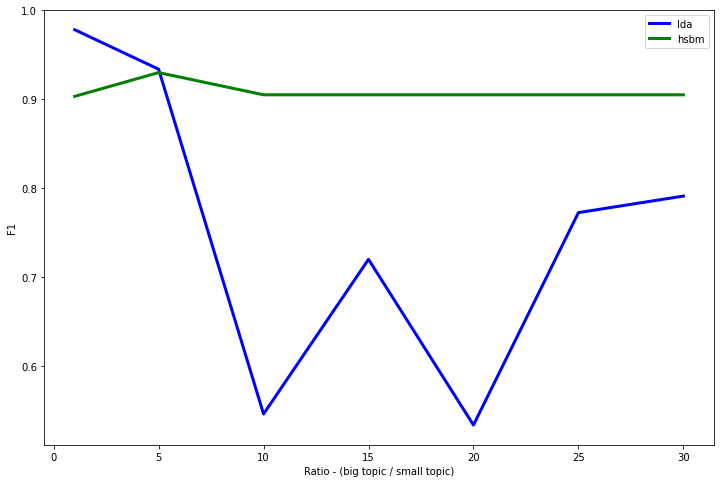

In [4]:

plt.figure(figsize=(12,8))
plt.plot(sim.ratio,sim.f1_min_f1_lda,label='lda',color='blue',lw=3)
plt.plot(sim.ratio,sim.f1_min_f1_hsbm,label='hsbm',color='g',lw=3)
plt.ylabel('F1')
plt.xlabel('Ratio - (big topic / small topic)')
plt.legend()
#plt.title('HSBM vs LDA: Size Imbalance',fontsize=20)
plt.savefig('resolution_limit_output/hsbmvslda_sizeimbalance.png',dpi=600)

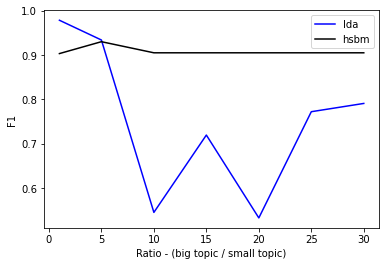

In [47]:

plt.plot(sim.ratio,sim.f1_min_f1_lda,label='lda',color='b')
plt.plot(sim.ratio,sim.f1_min_f1_hsbm,label='hsbm',color='k')
plt.ylabel('F1')
plt.xlabel('Ratio - (big topic / small topic)')
plt.legend()

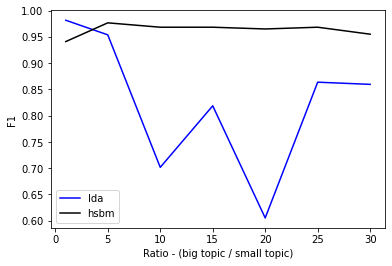

In [48]:

plt.plot(sim.ratio,sim.sum_f1_lda,label='lda',color='b')
plt.plot(sim.ratio,sim.sum_f1_hsbm,label='hsbm',color='k')
plt.ylabel('F1')
plt.xlabel('Ratio - (big topic / small topic)')
plt.legend()

In [445]:
#results['p_tw_d'].dot(doc_dist_proportions)

In [433]:
scipy.stats.entropy(list(distribution_counts[0:2])+[distribution_counts[-2:].sum()])

1.0979642041834419

In [435]:
list(distribution_counts[0:2])+[distribution_counts[-2:].sum()]

[158.24968225433764, 170.2282326517371, 171.5220850939254]

In [443]:
dist_ = []
for i in range(0,201,100):
    
    dist_.append(X[:,i:i+100].sum())

In [444]:
scipy.stats.entropy(dist_)

1.097995399434656

In [345]:

doc2topics = lda.fit_transform(X)
print(sorted(doc2topics.sum(axis=0)))
print(sorted(distribution_counts))

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
[75.28363830156732, 95.52517071011552, 161.21328129116662, 167.97790969715066]
[74.6594415116965, 94.92311369740793, 162.60918855249713, 167.8082562383982]


In [350]:
p_tw_w_l = lda.exp_dirichlet_component_

In [230]:
zero = min_state.levels[0]

In [232]:
blocks = zero.get_edge_blocks()

In [298]:
model.make_graph??

In [271]:
z1,z2 = state_l_edges[e]

In [278]:
v1 = e.source()
v2 = e.target()
v1,v2

(<Vertex object with index '999' at 0x7ff19095f330>,
 <Vertex object with index '1014' at 0x7ff1908b9510>)

In [279]:
#model.get_V??
n_wb = np.zeros((V,B)) ## number of half-edges incident on word-node w and labeled as word-group tw
n_db = np.zeros((D,B)) 
n_dbw = np.zeros((D,B)) ## number of half-edges incident on document-node d and label
for e in g.edges():
    z1,z2 = state_l_edges[e]
    v1 = e.source()
    v2 = e.target()
    if counts:
        weight = g.ep["count"][e]
    else:
        weight = 1
    n_db[int(v1), z1] += weight
    n_dbw[int(v1), z2] += weight
    n_wb[int(v2) - D, z2] += weight


In [294]:
Counter([tuple(state_l_edges[e]) for e in g.edges()])
    

Counter({(0, 1): 22422, (0, 2): 1363})

In [245]:
V = model.get_V()
D = model.get_D()
N = model.get_N()
g = model.g
state = min_state
state_l = state.project_level(0).copy(overlap=True)
state_l_edges = state_l.get_edge_blocks()
counts = 'count' in g.ep.keys()
B = state_l.B
n_wb = np.zeros((V,B)) ## number of half-edges incident on word-node w and labeled as word-group tw
n_db = np.zeros((D,B)) 
n_dbw = np.zeros((D,B)) ## number of half-edges incident on document-node d and label
for e in g.edges():
    z1,z2 = state_l_edges[e]
    v1 = e.source()
    v2 = e.target()
    if counts:
        weight = g.ep["count"][e]
    else:
        weight = 1
    n_db[int(v1), z1] += weight
    n_dbw[int(v1), z2] += weight
    n_wb[int(v2) - D, z2] += weight

p_w = np.sum(n_wb,axis=1)/float(np.sum(n_wb))
import numpy as np
ind_d = np.where(np.sum(n_db,axis=0)>0)[0]
Bd = len(ind_d)
n_db = n_db[:,ind_d]

ind_w = np.where(np.sum(n_wb,axis=0)>0)[0]
Bw = len(ind_w)
n_wb = n_wb[:,ind_w]

ind_w2 = np.where(np.sum(n_dbw,axis=0)>0)[0]
n_dbw = n_dbw[:,ind_w2]

## group-membership distributions
# group membership of each word-node P(t_w | w)
p_tw_w = (n_wb/np.sum(n_wb,axis=1)[:,np.newaxis]).T                                
p_td_d = (n_db/np.sum(n_db,axis=1)[:,np.newaxis]).T

## topic-distribution for words P(w | t_w)
p_w_tw = n_wb/np.sum(n_wb,axis=0)[np.newaxis,:]

## Mixture of word-groups into documetns P(t_w | d)
p_tw_d = (n_dbw/np.sum(n_dbw,axis=1)[:,np.newaxis]).T


result = {}
result['Bd'] = Bd
result['Bw'] = Bw
result['p_tw_w'] = p_tw_w
result['p_td_d'] = p_td_d
result['p_w_tw'] = p_w_tw
result['p_tw_d'] = p_tw_d


In [250]:
B = state_l.B
n_wb = np.zeros((V,B)) ## number of half-edges incident on word-node w and labeled as word-group tw
n_db = np.zeros((D,B)) 
n_dbw = np.zeros((D,B)) ## number of half-edges incident on document-node d and label


In [247]:
p_w = np.sum(n_wb,axis=1)/float(np.sum(n_wb))

In [200]:
model.L = min_state.levels
model.state = min_state

In [201]:
p_td_d,p_tw_w = model.group_membership(0)

/home/snorre/anaconda3/envs/graphtool/lib/python3.8/site-packages/graph_tool/inference/overlap_blockmodel.py:279: UserWarning: unrecognized keyword arguments: ['overlap']
  warnings.warn("unrecognized keyword arguments: " +


In [204]:
l_edges = zero.get_edge_blocks()

In [205]:
l_edges

<EdgePropertyMap object with value type 'vector<int32_t>', for Graph 0x7ff19181d3d0, at 0x7ff19136e8b0>

In [218]:
d = model.get_groups(l=0)

In [224]:
d.keys()

dict_keys(['Bd', 'Bw', 'p_tw_w', 'p_td_d', 'p_w_tw', 'p_tw_d'])

In [225]:
d['Bw']

2

In [222]:
d['p_tw_w'].shape

(2, 161)

In [159]:
model = run_hsbm(X)
p_td_d,p_tw_w = model.group_membership(l=0)

array([ 410.77997815,  420.67745359, 2097.20455188, 2071.33801637])

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


[699.1915226083789, 2576.1526613405363, 2716.715724066577, 4007.9400919844948]
[453.15250562869653, 456.94409716387935, 4524.968063699864, 4564.935333507537]


In [176]:
p_td_d,p_tw_w = model.group_membership(l=1)

In [177]:
p_td_d

array([[1., 1., 1., ..., 1., 1., 1.]])

In [136]:
doc_dist_proportions.T.dot(doc2topics)


array([[ 55.99889784, 461.75300302,  54.80897271, 108.66234355],
       [ 56.07829333, 109.22800543,  54.05004628, 450.37222657],
       [227.61099189, 107.93728289, 207.92542665, 105.57450982]])

In [142]:
sorted(doc2topics.sum(axis=0)),sorted(count_distributions)

([316.7844456442349, 339.6881830607428, 664.6090799497625, 678.9182913452582],
 [314.9517111913472, 339.29586085954236, 658.3489934164676, 687.403434532642])

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [217]:
doc2topics,lda = run_lda(X)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [218]:
word2topic = lda.components_
### Calculate CoOccurence stats.
top_occur,top_occur2,co_occur,w_sum,w2top,w2top2 = make_topic_co_occur(X)

## assign each distribition to topic.
assigned = doc_dist_proportions.T.dot(doc2topics).argsort().T[::-1].T[:,0]
## measure error
loss = np.zeros(3)
for num in range(3):
    a,a2 = doc_dist_proportions[:,num],doc2topics[:,assigned[num]]
    loss[num] = sum(abs(a-a2))
## measure individual doc error.
binned_losses = []
binned_stds = []
doc2loss = np.zeros((len(X),3))
for num in range(3):
    a,a2 = doc_dist_proportions[:,num],doc2topics[:,assigned[num]]
    temp_loss = a-a2
    doc2loss[:,num] = temp_loss
    sort_idx = a.argsort()
    ## Count 20 bins loss mean and std
    a,temp_loss = a[sort_idx],temp_loss[sort_idx]
    binned_loss = []
    binned_std = []
    for i,j in zip(np.linspace(0,1,20)[1:],np.linspace(0,1,20)[1:]):
        a_idx = (a<=i)&(a<j)
        temp_i = temp_loss[a_idx]
        binned_loss.append(temp_i.mean())
        binned_std.append(temp_i.std())
    binned_losses.append(binned_loss)
    binned_stds.append(binned_std)
## measure word loss
w2loss = w_sum.copy()

In [122]:
#w_sum


In [221]:
(w_sum-word2topic.max(axis=0)).sum()

-84.13920512604727

In [145]:
w2loss = w_sum.copy()
assigned = np.zeros(3,dtype=np.int)
for num in range(3):
    start,stop = num*n_tokens,(num+1)*n_tokens
    
    assigned[num] = int(word2topic[:,start:stop].sum(axis=1).argmax())
    
    top_num = assigned[num]
    w2loss[start:stop] = w2loss[start:stop] - word2topic[top_num,start:stop]

In [143]:
#word2topic[top_num]
top_num

0.0

In [132]:
word2topic[num*n_tokens:(num+1)*n_tokens]

array([], shape=(0, 300), dtype=float64)

In [98]:
w2loss = w_sum.copy()
for num in range(3):
    top_num = assigned[num]
    start,stop = num*n_tokens,(num+1)*n_tokens
    print(start,stop)
    w2loss[start:stop] = w2loss[start:stop] - word2topic[top_num,start:stop]

0 100
100 200
200 300


In [110]:
w2loss.argmax()

249

In [114]:
lda.

(3, 300)

In [106]:
w2loss[249]

570.6585639354855

In [109]:
loss.sum()+300

599.5165285712408

In [97]:
w2loss.sum()

7580.837032872638

In [94]:
w2loss

array([-3.23729905e-01, -3.16053707e-01, -3.25199323e-01, -3.19324780e-01,
       -3.24120701e-01, -3.31766311e-01, -3.22166560e-01, -3.21020055e-01,
       -3.27340300e-01, -3.28851654e-01, -3.29849053e-01, -3.23304567e-01,
       -3.30181943e-01, -3.23823115e-01, -3.26327693e-01, -3.08703157e-01,
       -3.29900189e-01, -3.29719745e-01, -3.20895633e-01,  7.08704823e-01,
       -3.31702528e-01, -9.37468228e-02, -3.28035171e-01, -3.08728754e-01,
       -3.14221734e-01, -3.23437877e-01, -3.29294272e-01, -3.26975722e-01,
       -3.24079212e-01, -3.28814369e-01, -3.28472402e-01, -3.26038254e-01,
       -3.24957125e-01, -3.02649269e-01, -3.29985537e-01, -3.29207292e-01,
       -3.19222283e-01, -3.27046717e-01, -3.26135751e-01, -3.23577114e-01,
       -3.25720221e-01, -2.82321186e-01, -3.20444139e-01, -3.25780438e-01,
       -3.29649602e-01, -3.21720042e-01, -3.26358423e-01, -3.30417250e-01,
       -3.10870408e-01, -3.06269337e-01, -3.12341699e-01, -3.26205039e-01,
       -3.13916541e-01,  

In [83]:
w_sum

array([  43.,   57.,   47.,   42.,   62.,   49.,   35.,   55.,   52.,
         55.,   44.,   48.,   47.,   47.,   50.,   45.,   43.,   50.,
         46.,   45.,   42.,   52.,   49.,   56.,   51.,   41.,   48.,
         51.,   45.,   41.,   56.,   57.,   49.,   52.,   43.,   52.,
         48.,   47.,   44.,   54.,   56.,   59.,   51.,   45.,   55.,
         47.,   35.,   52.,   49.,   53.,   56.,   41.,   53.,   65.,
         53.,   45.,   47.,   47.,   51.,   66.,   85.,   97.,   94.,
        100.,  110.,   98.,  103.,  106.,  107.,  105.,   96.,   89.,
         79.,  115.,  162.,  141.,  164.,  139.,  163.,  151.,  148.,
        165.,  125.,  201.,  214.,  215.,  240.,  210.,  256.,  302.,
        270.,  326.,  253.,  366.,  352.,  372.,  481., 1022., 1192.,
       2531.,  127.,  121.,  137.,  163.,  152.,  145.,  141.,  151.,
        123.,  144.,  156.,  147.,  160.,  141.,  124.,  161.,  142.,
        138.,  142.,  152.,  119.,  139.,  168.,  148.,  119.,  139.,
        150.,  132.,

In [87]:
#word2topic[.sum(axis=0)-w_sum

In [74]:
loss

array([ 81.93541814,   2.06541645, 215.51569398])

In [373]:
doc2topics.sum(axis=0)/doc2topics.sum()

array([0.3408705 , 0.42307581, 0.23605368])

In [376]:
doc_dist_proportions.sum(axis=0)/doc_dist_proportions.sum()

array([0.4988037, 0.4986981, 0.0024982])

In [372]:
params

{'docsize': 200,
 'n_docs': 500,
 'proportion_variance': 10,
 'ratio': 200.0,
 'reverse_ratio': True,
 'subtopic_overlap': 10,
 'ratio_pos': 2}

In [285]:
! mkdir simulation_results\results

In [93]:
import tqdm
dsizes = np.linspace(10,100,10)
n_dsizes = np.linspace(100,2000,10)
mat = []
for n_d in tqdm.tqdm(n_dsizes):
    for dsize in dsizes:
        X,sub_sizes,doc_dist_proportions,distribution_counts = generate_docs(n_docs=int(n_d),docsize=dsize,)
        continue
        #print(1+'2')
        doc2topics,lda = run_lda(X)
        topcounts = doc_dist_proportions.sum(axis=0)
        fracs = topcounts/topcounts.sum()
        #print(fracs)
        mat.append(scipy.stats.entropy(fracs))

100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


([<matplotlib.axis.XTick at 0x23b7b2fe278>,
 <a list of 10 Text xticklabel objects>)

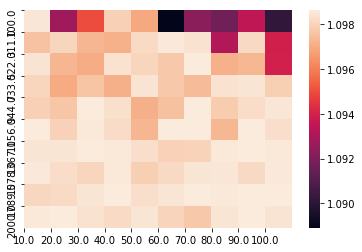

In [67]:
mat = np.array(mat)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(mat.reshape(10,10))
plt.yticks(range(len(n_dsizes)),map(round,n_dsizes))
plt.xticks(range(len(n_dsizes)),map(round,dsizes))

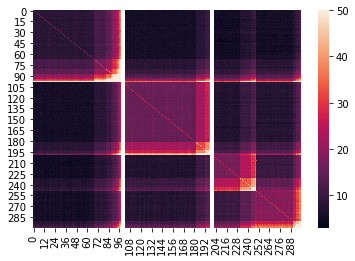

In [94]:

def heatmap_interact(vmax=50):    
    co_occur = X.T.dot(X)
    sns.heatmap(np.sqrt(co_occur),vmax=vmax,)
    for i in range(1,3):
        plt.vlines(i*100,0,300,lw=4,color='white')
heatmap_interact()

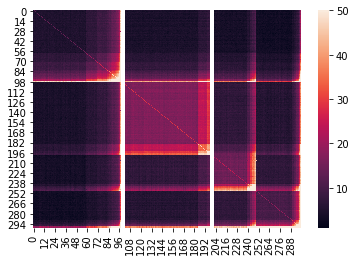

In [114]:

def heatmap_interact(vmax=50):    
    co_occur = X.T.dot(X)
    sns.heatmap(np.sqrt(co_occur),vmax=vmax,)
    for i in range(1,3):
        plt.vlines(i*100,0,300,lw=4,color='white')
heatmap_interact()

In [129]:
count = 0 
for a in make_topic_co_occur(X):
    count+=len(a.flatten())
count

94125

In [132]:
#len(X.flatten())

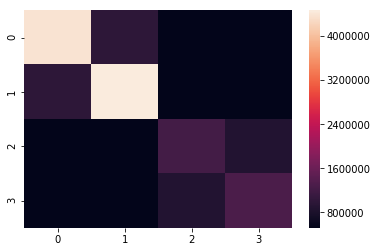

In [85]:
sns.heatmap(top_occur)

array([[0.68288499, 0.15216966, 0.16404605],
       [0.15424175, 0.68633933, 0.16486868],
       [0.16287327, 0.16149101, 0.67108527]])

In [95]:
Xbool = X/X
Xbool = np.nan_to_num(Xbool)
co_occur2 = []
for x in Xbool.T:
    for xi in Xbool.T:
        #co = x.dot(xi)/((xi.dot(xi)+x.dot(x))/2)
        co = x.dot(xi)/sum(x)
        #if sum(co>1)>0:
         #   print(1+'2')
        co_occur2.append(co)
co_occur2 = np.array(co_occur2).reshape(300,300)


<ipython-input-95-90688ace5d50>:1: RuntimeWarning: invalid value encountered in true_divide
  Xbool = X/X


<AxesSubplot:>

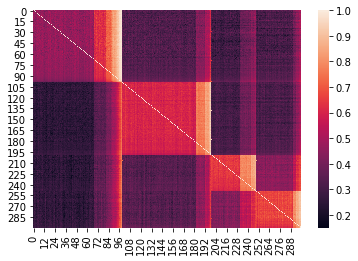

In [96]:
sns.heatmap(np.sqrt(co_occur2))

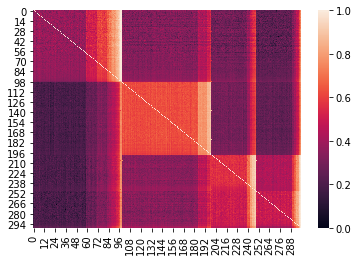

In [55]:
sns.heatmap(np.sqrt(co_occur2))

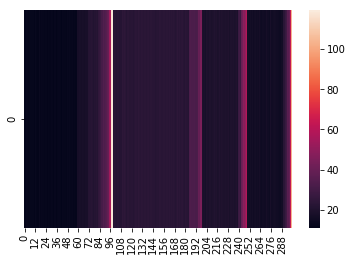

In [109]:
sns.heatmap(np.sqrt(X.sum(axis=0)).reshape(1,-1))

In [95]:
from ipywidgets import interact,fixed
interact(heatmap_interact,vmax=range(5,50))

interactive(children=(Dropdown(description='vmax', options=(5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…

<function __main__.heatmap_interact(vmax=50)>

C:\Users\jbv933\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


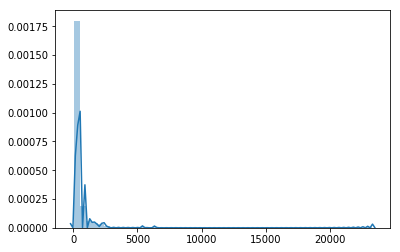

In [28]:
sns.distplot(X.sum(axis=0))

In [ ]:
## Co-occurence matrice. 


In [ ]:
for n_d in np.linspace(100,5000,10):
    X,sub_sizes,doc_topic_proportions = generate_docs(n_docs=int(n_d),docsize=20)
    doc2topics,lda = run_lda(X)
    topcounts = doc_topic_proportions.sum(axis=0)
    print(topcounts/topcounts.sum())

In [106]:
### 
## Learning rate
### N_docs

## 


,0.050000,0.050240,0.050482,0.050726,0.050973,0.051223,0.051474,0.051729,0.051985,0.052245,...,19.140704,19.236181,19.331658,19.427136,19.522613,19.618090,19.713568,19.809045,19.904523,20.000000
0,9.998191e-01,9.666148e-01,1.000000e+00,4.466126e-53,5.038475e-12,1.000000e+00,9.998409e-01,1.393212e-15,3.552045e-14,7.092296e-11,...,0.431604,0.496619,0.585582,0.562511,0.468254,0.492808,0.606623,0.414251,0.375710,0.488358
1,1.809016e-04,3.338516e-02,6.842601e-11,1.000000e+00,1.000000e+00,7.212496e-39,1.591365e-04,1.000000e+00,1.000000e+00,1.000000e+00,...,0.568396,0.503381,0.414418,0.437489,0.531746,0.507192,0.393377,0.585749,0.624290,0.511642
2,6.705866e-21,2.127480e-15,6.731504e-03,6.874072e-01,7.149047e-07,1.000000e+00,1.000000e+00,1.000000e+00,9.903425e-01,1.000000e+00,...,0.435103,0.446608,0.390002,0.685640,0.760526,0.441200,0.467258,0.391156,0.568500,0.526049
3,1.000000e+00,1.000000e+00,9.932685e-01,3.125928e-01,9.999993e-01,2.255655e-29,1.696423e-15,1.817658e-46,9.657543e-03,8.809082e-58,...,0.564897,0.553392,0.609998,0.314360,0.239474,0.558800,0.532742,0.608844,0.431500,0.473951
4,9.991660e-01,1.000000e+00,9.811212e-01,5.615215e-35,1.126759e-08,1.000000e+00,1.611239e-07,6.454537e-64,1.000000e+00,3.460685e-40,...,0.574917,0.520490,0.339854,0.544491,0.424922,0.322910,0.498051,0.486903,0.434529,0.530387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.000000e+00,9.468291e-16,1.000000e+00,1.200695e-26,2.659962e-86,7.944638e-01,1.000000e+00,3.003912e-03,1.403441e-09,1.000000e+00,...,0.508579,0.392052,0.517757,0.394055,0.638288,0.422013,0.482224,0.589899,0.374374,0.626310
1996,1.000000e+00,7.578713e-10,6.016597e-46,1.000000e+00,1.000000e+00,1.000000e+00,4.692735e-02,9.899769e-01,1.000000e+00,1.335281e-07,...,0.587170,0.532624,0.659893,0.512923,0.373716,0.378135,0.445603,0.445181,0.417132,0.510981
1997,9.635575e-69,1.000000e+00,1.000000e+00,2.932507e-08,3.182048e-50,8.554384e-19,9.530727e-01,1.002314e-02,3.586222e-14,9.999999e-01,...,0.412830,0.467376,0.340107,0.487077,0.626284,0.621865,0.554397,0.554819,0.582868,0.489019
1998,1.000000e+00,3.390650e-07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.049038e-01,1.214648e-09,9.425567e-11,3.169173e-27,...,0.653971,0.531811,0.574347,0.442541,0.412158,0.310095,0.635094,0.510172,0.623164,0.397313


C:\Users\jbv933\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


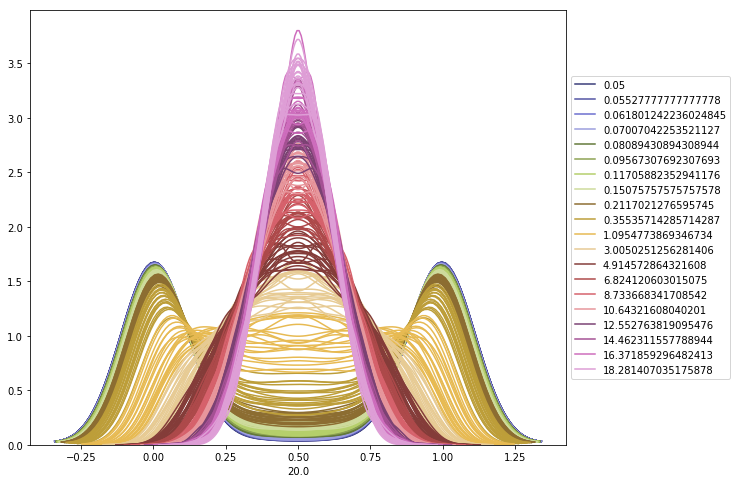

In [273]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111)
cmap = plt.cm.get_cmap('tab20b', len(dist_df.columns)) #plt.cm.magma(dist_df.columns)#

for num,col in enumerate(dist_df):
    if num%20==0:
        sns.distplot(dist_df[col],label=str(col),hist=False,color=cmap(num))
    else:
        sns.distplot(dist_df[col],hist=False,color=cmap(num))
#sns.distplot(dist_df.unstack().reset_index(),hue='level_0')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.colorbar(cmap)
#import matplotlib as mpl

#cax = fig.add_axes([1, 0, 0.2, 1])
#cb1 = mpl.colorbar.ColorbarBase(ax=cax, cmap=cmap,
#                                orientation='vertical')

19

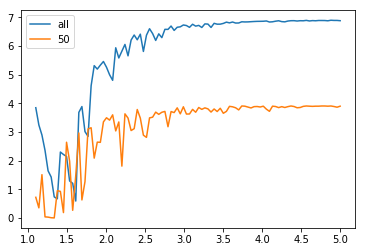

In [194]:
y,y2 = [],[]
x = np.linspace(1.1,5,100)
for a in x:
    temp = []
    for i in range(1000):
        ps = np.random.zipf(a=a,size=1000)
        temp.append(ps)
    temp = np.array(temp)
    #ps = ps/ps.sum()
    ent,ent2 = normalize_entropy(temp),normalize_entropy(temp[:,0:50])
    y.append(ent),y2.append(ent2)
    #ent = round(scipy.stats.entropy(ps),2)
    #ent2 = round(scipy.stats.entropy(ps[0:50]),2)
    #print(a,ent,ent2)
plt.plot(x,y,label='all')
plt.plot(x,y2,label='50')
plt.legend()

In [155]:
ps = np.random.zipf(a=3,size=100)
ps = ps/ps.sum()
np.random.multinomial(10,ps)

## distributions should be Fragments already that are then permuted into different combinations with other. 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [168]:

a = np.random.zipf(a=1.5,size=200)
a.sort()
a


array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     4,
           4,     4,     4,     4,     4,     4,     4,     5,     5,
           5,     5,

In [139]:
## define all configurations
### entropy 
## defined by the zipf distribution parameter, going from 1.5

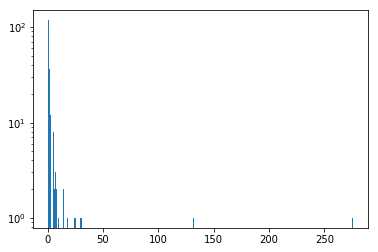

In [141]:
np.random.zipf()

In [112]:
dist.flatten()

array([ 0.49419832,  0.40668083,  1.62154964, ..., -0.15205365,
        1.44530806, -1.0852811 ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E63EF88D0>,
      dtype=object)

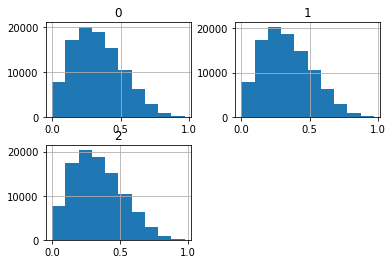

In [63]:
## Generative scheme: Multiple topics pr doc.


pd.DataFrame(np.random.dirichlet([2,2,2],size=100000,)).hist()
#sns.distplot(pd.DataFrame(np.random.dirichlet([0.33,0.33,0.33],size=100000)))

## Collapsing:
Increase the number of documents generated by Topic 2 (under normal distribution).
Until 1 and 3 become to small to hold a topic for them selves.

In [107]:
def transform2categorical(X,decimals=1):
    X = X.round(decimals)
    # construct index.
    c = Counter(X.flatten())
    docs = np.zeros((len(X),len(c)))
    trans = {}
    for num,(key,val) in enumerate(c.most_common(len(c))):
        trans[key] = num
    for num,doc in enumerate(X):
        for key in doc:
            col = trans[key]
            docs[num,col]+=1

    return docs,trans


In [113]:
catdocs,trans = transform2categorical(X)

In [129]:
def get_loss(dist2topic):
    "calculates how well each distribution has gotten their own topic."
    loss = len(dist2topic) -sum(dist2topic[np.arange(len(dist2topic)),np.argsort(dist2topic).T[::-1][:,0]])
    return loss
def make_dist2topic(doc2topics):
    dist2topic = []
    for start,stop in startstop:    
        dist2topic.append(doc2topics[start:stop].mean(axis=0))
    dist2topic = np.array(dist2topic)
    return dist2topic
def get_main_topic(dist2topic):
    
    return np.argsort(dist2topic).T[::-1][:,0]
    
def run_lda(docs):
    lda = LDA(n_components=3,learning_method='batch',verbose=1)
    doc2topics = lda.fit_transform(docs)
    return doc2topics,lda

def get_measures(doc2topic):
    dist2topic = make_dist2topic(doc2topics)
    dist2max = get_main_topic(dist2topic)
    loss = get_loss(dist2topic)
    proportions = get_proportions(doc2topics)
    return dist2topic,dist2max,doc2topics,loss

def get_proportions(doc2topic):
    proportions = doc2topics.sum(axis=0)
    return proportions

### impact of document size on the confusion between distributions

In [ ]:

sizes = [[1000,i,1000] for i in np.arange(1000,10000,1000)] # keeps 1,3 stable size and adds 2 distribution docs 

docsizes = np.arange(100,1000,50)

spans = [] # 
scales = []
configurations = [{'loc':2,'scale':0.75,'size':(1000,100)}
                  ,{'loc':0,'scale':0.75,'size':(1000,100)},
                 {'loc':-2,'scale':0.75,'size':(1000,100)}]


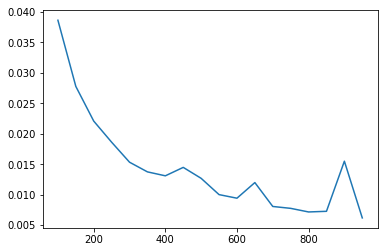

In [176]:
# test the impact of document size on the performance of the model.
losses = []
for size in tqdm(sizes):
    new_conf = configurations.copy()
    for i in range(len(new_conf)):
        sizes = list(new_conf[i]['size'])
        sizes[1] = size
        new_conf[i]['size'] = tuple(sizes)

    X = []
    for conf in configurations:
        x = np.random.normal(**conf)
        X.append(x)

    X = np.concatenate(X)
    docs,trans = transform2categorical(X)
    idx = np.cumsum([conf['size'][0] for conf in configurations])
    startstop = list(zip([0]+list(idx[:-1]),list(idx)))
    xticks = sorted(trans)

    ## calculate wordlevel overlap.
    val2dist = np.zeros((len(trans),3))
    for d_num,(start,stop) in enumerate(startstop):
        dist = docs[start:stop,:]
        for num,key in enumerate(xticks):
            idx = trans[key]
            val2dist[num,d_num] = dist[:,idx].sum()
    # count all words
    counts = np.zeros(len(trans))
    for num,key in enumerate(xticks):
        idx = trans[key]
        counts[num] = docs[:,idx].sum()

    ## calculate percentage in main distribution for each value
    val2sort = np.argsort(val2dist,axis=1)[::-1]
    maxcount = val2dist[np.arange(len(val2dist)),np.argsort(val2dist,axis=1).T[::-1].T[:,0]]
    maxfrac = maxcount/counts
    overlap_measure = sum([1]*len(maxfrac))-maxfrac.sum()
    ## calculate relative fractions between distributions
    dist2topic,dist2max,lda, doc2topics,loss = run_lda(docs)
    losses.append(loss)
plt.plot(docsizes,losses)

**The above points to the results of the 2014 paper on social media texts. It shows that with fewer samples from the distribution, it becomes less distinquishable from the others, given the relative strength of an outlier in some "unlucky" documents. However this is in a very simple case with only one distribution pr. documents, and a very small overlap. Real documents has complex co-occurence graphs and strong overlaps, being drawn from many distributions. So the number of "words" pr. documents migth actually have to be much larger than what is suggested from this graph.**

The results might suggests:
*That only a small sample from one distribution makes the convergence / topic assignment much more unstable. **

* Or that "unlucky" documents with many of the overlapping words, might be assigned due to similarity to another topic." 

20000 0.0983577896817236 13.810478148006638
30000 1.5053157217503867 13.49414882378926
40000 0.08555120114037562 13.791742281295058
50000 0.20557859690846625 13.693973228003841
60000 1.6263059836183158 13.470762369662722
70000 0.4182414343417302 13.863551196693564
80000 0.4320835609786289 13.740138927896368
90000 0.2688426871865266 13.596700486606764



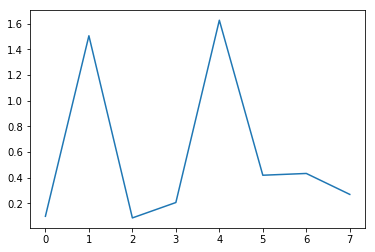

In [29]:

sizes = [[1000,i,1000] for i in np.arange(1000,10000,1000)] # keeps 1,3 stable size and adds 2 distribution docs 

docsizes = np.arange(100,1000,50)
spans = [] # 
scales = []
configurations = [{'loc':2,'scale':1.0,'size':(1000,50)}
                  ,{'loc':0,'scale':1.0,'size':(1000,50)},
                 {'loc':-2,'scale':1.0,'size':(1000,50)}]

# test the impact of document size on the performance of the model.
from tqdm import tqdm_notebook as tqdm
dist_sizes = [[500,i,500] for i in np.arange(20000,100000,10000)]
losses = []
for size in tqdm(dist_sizes):
    new_conf = configurations.copy()
    for i in range(len(new_conf)):
        sizes = list(new_conf[i]['size'])
        sizes[0] = size[i]
        new_conf[i]['size'] = tuple(sizes)

    X = []
    for conf in configurations:
        x = np.random.normal(**conf)
        X.append(x)
    
    X = np.concatenate(X)
    docs,trans = transform2categorical(X)
    idx = np.cumsum([conf['size'][0] for conf in configurations])
    startstop = list(zip([0]+list(idx[:-1]),list(idx)))
    xticks = sorted(trans)

    ## calculate wordlevel overlap.
    val2dist = np.zeros((len(trans),3))
    for d_num,(start,stop) in enumerate(startstop):
        dist = docs[start:stop,:]
        for num,key in enumerate(xticks):
            idx = trans[key]
            val2dist[num,d_num] = dist[:,idx].sum()
    # count all words
    counts = np.zeros(len(trans))
    for num,key in enumerate(xticks):
        idx = trans[key]
        counts[num] = docs[:,idx].sum()

    ## calculate percentage in main distribution for each value
    val2sort = np.argsort(val2dist,axis=1)[::-1]
    maxcount = val2dist[np.arange(len(val2dist)),np.argsort(val2dist,axis=1).T[::-1].T[:,0]]
    maxfrac = maxcount/counts
    overlap_measure = sum([1]*len(maxfrac))-maxfrac.sum()
    ## calculate relative fractions between distributions
    dist2topic,dist2max,lda, doc2topics,loss = run_lda(docs)
    ## sum up proportions of the topics using the doc2topics
    proportions = doc2topics.sum(axis=0)
    
    losses.append(loss)
    print(size[1],loss,overlap_measure)
plt.plot(losses)

Text(0.5,1,'Distribution exclusivity')

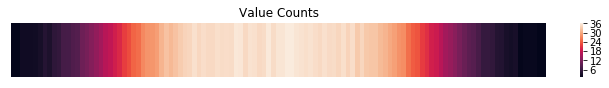

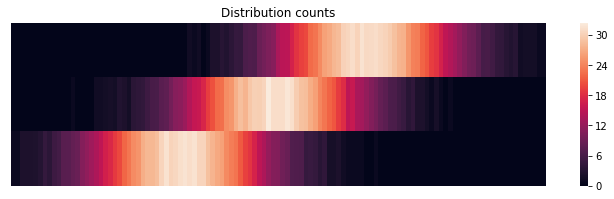

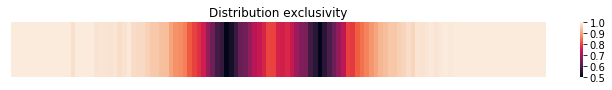

In [24]:
### Visualize distributions and overlap
plt.figure(figsize=(12,1))
sns.heatmap(np.sqrt(counts).reshape(1,-1),xticklabels=False,yticklabels=False)
plt.title('Value Counts')
plt.figure(figsize=(12,3))
sns.heatmap(np.sqrt(val2dist).T,xticklabels=False,yticklabels=False)
plt.title('Distribution counts')
plt.figure(figsize=(12,1))
sns.heatmap((maxcount/counts).reshape(1,-1),xticklabels=False,yticklabels=False)
plt.title('Distribution exclusivity')

In [18]:
dist2topic[np.arange(len(dist2topic)),np.argsort(dist2topic).T[::-1].T[0]]

array([0.9835769 , 0.96741819, 0.98092803])

### Investigate docsize and overlap relation to loss.
Can we show how much confusion is introduced when docsizes are too small, but that this is not stable in relation to the underlying co-occurence graph.

### Investigate the resolution limit

-- Add noise to each document, from other distributions, and see if they can't actually be assigned to another topic, given the strong overweight of one topic on the document. 

Text(0.5,1,'Distribution exclusivity')

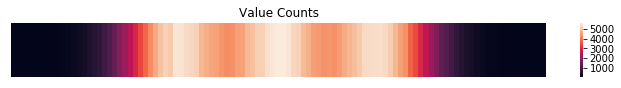

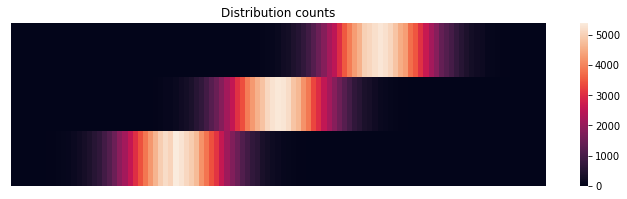

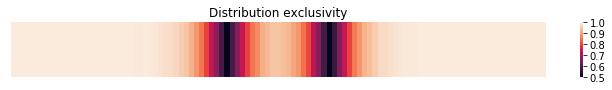

In [149]:
### Visualize distributions and overlap
plt.figure(figsize=(12,1))
sns.heatmap(counts.reshape(1,-1),xticklabels=False,yticklabels=False)
plt.title('Value Counts')
plt.figure(figsize=(12,3))
sns.heatmap(val2dist.T,xticklabels=False,yticklabels=False)
plt.title('Distribution counts')
plt.figure(figsize=(12,1))
sns.heatmap((maxcount/counts).reshape(1,-1),xticklabels=False,yticklabels=False)
plt.title('Distribution exclusivity')

In [167]:
def run_lda(docs):
    lda = LDA(n_components=3,learning_method='batch',verbose=0)
    doc2topics = lda.fit_transform(docs)
    dist2topic = []
    for start,stop in startstop:    
        dist2topic.append(doc2topics[start:stop].mean(axis=0))
    dist2topic = np.array(dist2topic)
    loss = len(dist2topic) -sum(dist2topic[np.arange(len(dist2topic)),np.argsort(dist2topic).T[::-1][:,0]])
    return dist2topic,lda, doc2topics,loss


In [165]:
loss = len(dist2topic) -sum(dist2topic[np.arange(len(dist2topic)),np.argsort(dist2topic).T[::-1][:,0]])
print(loss)

0.039188735235544225


In [ ]:
sns.heatmap(dist2topic)

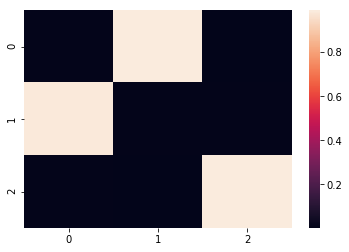

In [42]:
word2topic = lda.components_

In [25]:
from collections import Counter
len(Counter(X.round(1).flatten()))

85

In [15]:
# distribution features
base = {'loc':0,'scale':1}
## entropy features
#def base_rounding(val,scale={'min':0,'max':101,'splits':102}):
n_feat = 100


def rounding(val,scale = {'max':1,'min':0,'splits':100}):
    return ...

dists = [{'loc':0,'scale':1},
        {'loc':1,'scale':1},
        {'loc':2,'scale':1}]
## vary the size.
n_docs = 999

##### dirichlet

##
np.random.normal(loc = 0, scale=3,size= 100)
np.random.uniform()

-6.398607100551271

## Metrics:
- How many datapoints / columns, have a high entropy in the Topic-word distribution (i.e. has been assigned to different topics)
    - Normalized by what is expected from the True distribution of overlaps. I.e. how many different distribution each class has been generated from due to the configured overlap between distributions. 
    
    -- Visualize the entropy of each point.

In [ ]:
## visualize the density of each area in the distribution as one topic become more dominant.

### Visualization:
- Draw it as density contours.
- Show the True boundaries, and the Model Boundaries.
    - The Model Contours. Since it is a mixed membership model, it should show the probabilty of each point.

   
- Visualize it dynamically as the Entropy of the Topic Proportion Distribution goes up (or down).
    - The lower entropy the better the Default model will do.



